# Assignment 2 - Dataset description

The questions below relate to the data files associated with the contest with the title "Beijing Multi-Site Air Quality Data" published at the following website. https://archive.ics.uci.edu/ml/datasets/Beijing+Multi-Site+Air-Quality+Data

Problem description:

Your goal is to predict the PM 2.5 levels in the air to determine the Air quality of Beijing. There are multiple datasets concerning different districts in Beijing. The data was recorded hourly for each district.Throughout, missing values have been filled as NaNs.

Dataset Description: This data set includes hourly air pollutants data from 12 nationally-controlled air-quality monitoring sites. The air-quality data are from the Beijing Municipal Environmental Monitoring Center. The meteorological data in each air-quality site are matched with the nearest weather station from the China Meteorological Administration. The time period is from March 1st, 2013 to February 28th, 2017. Missing data are denoted as NA.

Assignment:

The goal is achieved through three subsequent Assignments 1, and 2 all using the same dataset

The features in this dataset are provided as following

No: row number year: year of data in this row month: month of data in this row day: day of data in this row hour: hour of data in this row PM2.5: PM2.5 concentration (ug/m^3) PM10: PM10 concentration (ug/m^3) SO2: SO2 concentration (ug/m^3) NO2: NO2 concentration (ug/m^3) CO: CO concentration (ug/m^3) O3: O3 concentration (ug/m^3) TEMP: temperature (degree Celsius) PRES: pressure (hPa) DEWP: dew point temperature (degree Celsius) RAIN: precipitation (mm) wd: wind direction WSPM: wind speed (m/s) station: name of the air-quality monitoring site

(Where appropriate, units are provided as a _unit suffix on the feature name.)



# Assignment 2 Questions

Use the merged data frame from Assignment 1 for this assignment. This Assignment focuses on data preprocessing and model building. Continue with the datasets loaded in Assignment 1 (or reload with same steps and create merged data frame). You will be predicting PM2.5 levels using a machine learning model in this assignment.  

1. Take a subset of the dataset(10%-15% of the dataset(because hyper-parameter search will take more time to compute)) for modelling. Please do the following using the same subset.

•	Import the required libraries

.   Remove variables if you find multicollinearity between independent variables.

.   Reindex the columns such that target variable(PM2.5) should be at the last in the column index.

•	Make an 80-20 stratified split based on the target data

•	Preprocess the data (Encode the categorical features and Standardize the numerical features) of merged dataset


•	Build a stochastic gradient descent regressor, train the model

•	Evaluate your model based on applicable metrics. Show the metric(s) you chose and why you chose this(these) metrics.

•	List the hyper-parameters that can be tuned in SGD. Show the code along with comments on the parameter value chosen (use class presentation, discussion notes, some online reading) and why this value was chosen. Show the improvement you achieved in model accuracy. 



- Optional(no extra credit): Try predicting the target variable with SVM regressor or any other ML model and show the improvement.




# Submit the following for this assignment:

.ipynb and .html formats of Jupyter notebook code with outputs. Please follow the coding standards.(can loose marks on this, if it is not done properly)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
#Reading all the datasets
df1 = pd.read_csv("PRSA_Data_Aotizhongxin_20130301-20170228.csv")
df2 = pd.read_csv("PRSA_Data_Changping_20130301-20170228.csv")
df3 = pd.read_csv("PRSA_Data_Dingling_20130301-20170228.csv")
df4 = pd.read_csv("PRSA_Data_Dongsi_20130301-20170228.csv")
df5 = pd.read_csv("PRSA_Data_Guanyuan_20130301-20170228.csv")
df6 = pd.read_csv("PRSA_Data_Gucheng_20130301-20170228.csv")
df7 = pd.read_csv("PRSA_Data_Huairou_20130301-20170228.csv")
df8 = pd.read_csv("PRSA_Data_Nongzhanguan_20130301-20170228.csv")
df9 = pd.read_csv("PRSA_Data_Shunyi_20130301-20170228.csv")
df10 = pd.read_csv("PRSA_Data_Tiantan_20130301-20170228.csv")
df11 = pd.read_csv("PRSA_Data_Wanliu_20130301-20170228.csv")
df12 = pd.read_csv("PRSA_Data_Wanshouxigong_20130301-20170228.csv")

In [3]:
df_merged = pd.concat([df1,df2,df3,df4,df5,df6,df7,df8,df9,df10,df11,df12])

In [4]:
df_merged.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin


In [5]:
# Taking subset of data using 15% sample of merged data.
df_sub=df_merged.sample(frac=0.15)
df_sub.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
7695,7696,2014,1,15,15,121.0,138.0,95.0,86.0,1900.0,17.0,3.8,1019.2,-17.2,0.0,ESE,1.8,Changping
5218,5219,2013,10,4,10,75.0,83.0,22.0,40.0,1400.0,26.0,19.1,1005.6,12.1,0.0,SE,1.2,Huairou
34300,34301,2017,1,28,4,681.0,915.0,159.0,75.0,300.0,2.0,-3.5,1019.0,-13.5,0.0,NE,1.8,Dongsi
8929,8930,2014,3,8,1,72.0,84.0,32.0,55.0,1600.0,16.0,0.7,1017.1,-16.2,0.0,SE,0.6,Changping
22287,22288,2015,9,15,15,98.0,98.0,23.0,27.0,1100.0,208.0,25.7,1009.3,11.5,0.0,SE,1.7,Changping


In [6]:
#converting to categorical variables
df_sub.year = df_sub.year.astype('category')
df_sub.month = df_sub.month.astype('category')
df_sub.station = df_sub.station.astype('category')
df_sub.day=df_sub.day.astype('category')
df_sub.wd=df_sub.wd.astype('category')


print(df_sub['year'].unique(),df_sub['month'].unique(),df_sub['station'].unique(),df_sub['day'].unique(),df_sub['wd'].unique())

[2014, 2013, 2017, 2015, 2016]
Categories (5, int64): [2014, 2013, 2017, 2015, 2016] [1, 10, 3, 9, 4, ..., 12, 8, 2, 5, 7]
Length: 12
Categories (12, int64): [1, 10, 3, 9, ..., 8, 2, 5, 7] [Changping, Huairou, Dongsi, Dingling, Guanyuan, ..., Tiantan, Gucheng, Nongzhanguan, Wanliu, Aotizhongxin]
Length: 12
Categories (12, object): [Changping, Huairou, Dongsi, Dingling, ..., Gucheng, Nongzhanguan, Wanliu,
                          Aotizhongxin] [15, 4, 28, 8, 7, ..., 27, 3, 2, 5, 19]
Length: 31
Categories (31, int64): [15, 4, 28, 8, ..., 3, 2, 5, 19] [ESE, SE, NE, SW, ENE, ..., WSW, W, SSE, NaN, SSW]
Length: 17
Categories (16, object): [ESE, SE, NE, SW, ..., WSW, W, SSE, SSW]


In [7]:
#dropping null values in target variable 
df_sub.dropna(subset = ['PM2.5'], inplace = True)
df_sub.isnull().sum()/df_sub.count()
df_sub = df_sub.dropna()

df_sub.isnull().sum()

No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64

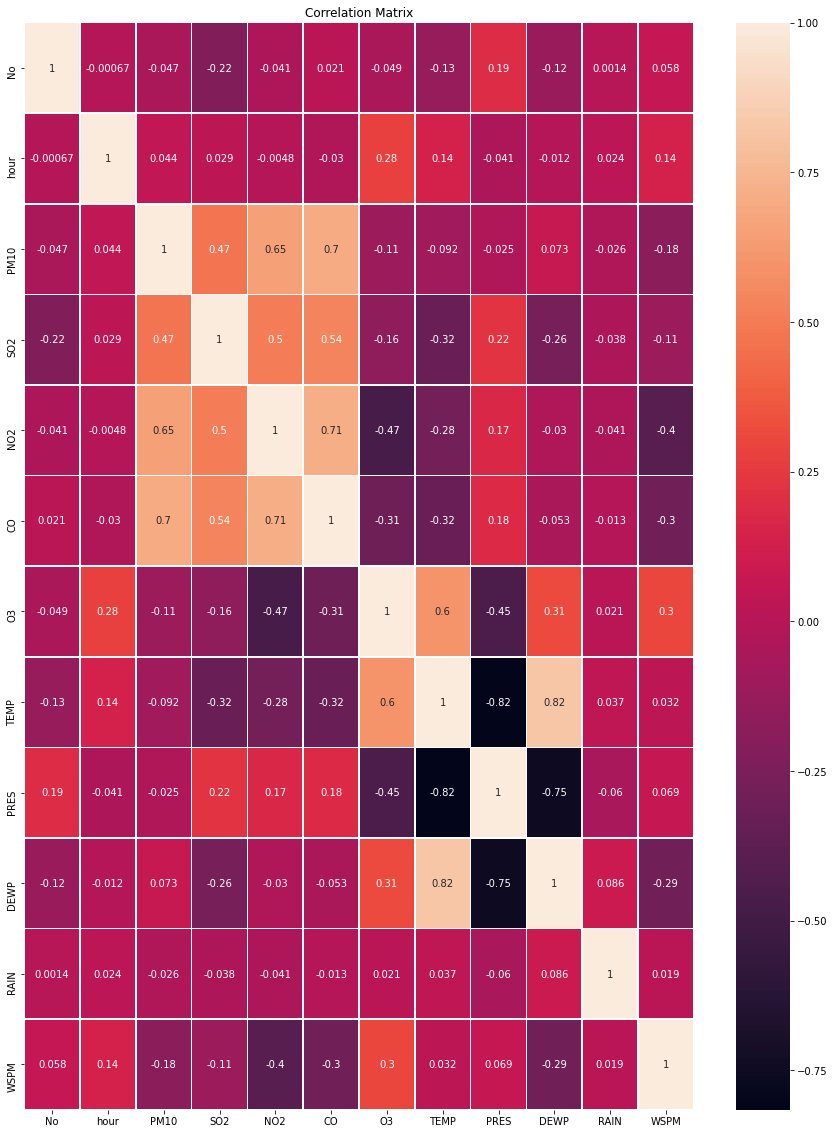

In [8]:
#checking the correlation between independent variables
plt.figure(figsize=(15, 20))
plt.title('Correlation Matrix')
sns.heatmap(df_sub.iloc[:,df_merged.columns != 'PM2.5'].corr(), annot=True, linewidth = 0.75)
plt.show()

In [9]:
# Dropping unnecessary column "No" and highly correlated columns "PRES" and "DEWP" as they are correlated with "TEMP", "PRES" and "DEWP".
df_sub = df_sub.drop('No',axis=1)
df_sub = df_sub.drop('PRES',axis=1)
df_sub = df_sub.drop('DEWP',axis=1)
df_sub.head(3)

,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,RAIN,wd,WSPM,station
7695,2014,1,15,15,121.0,138.0,95.0,86.0,1900.0,17.0,3.8,0.0,ESE,1.8,Changping
5218,2013,10,4,10,75.0,83.0,22.0,40.0,1400.0,26.0,19.1,0.0,SE,1.2,Huairou
34300,2017,1,28,4,681.0,915.0,159.0,75.0,300.0,2.0,-3.5,0.0,NE,1.8,Dongsi


In [10]:
# Importing the necessary libraries
from sklearn.model_selection import StratifiedKFold
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from numpy import absolute, mean, std 
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import learning_curve
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import r2_score

In [11]:
# Reindexing PM2.5 to be last column 
df_sub = df_sub.reindex(columns = ['year', 'month', 'day', 'hour', 'PM10', 'SO2', 'NO2', 'CO',
       'O3', 'TEMP', 'RAIN', 'wd', 'WSPM', 'station', 'PM2.5'])


In [12]:
# Independent variables and dependent variables and placed them into X and y respectively from the merged df
X=df_sub[['year', 'month', 'day', 'hour', 'PM10', 'SO2', 'NO2', 'CO','O3', 'TEMP', 'RAIN', 'wd', 'WSPM', 'station']]
y=df_sub[['PM2.5']]

In [13]:
# Stratified 80-20 train test split and keeping shuffle parameter true
X_train, X_test, y_train, y_test = train_test_split(X, y,stratify=X['station'], test_size=0.20, random_state=42)

In [14]:
X_train.station.value_counts()

Tiantan          3998
Wanshouxigong    3986
Gucheng          3953
Nongzhanguan     3942
Changping        3886
Guanyuan         3871
Aotizhongxin     3848
Huairou          3836
Dingling         3716
Shunyi           3643
Dongsi           3612
Wanliu           3579
Name: station, dtype: int64

In [15]:
scaler = StandardScaler()
le = LabelEncoder() 

In [16]:
X_train.year.value_counts()

2016    11915
2015    11828
2014    11545
2013     8658
2017     1924
Name: year, dtype: int64

In [17]:
# Fitting the categorical variables using label_encoder on the train and test data
X_train=pd.get_dummies(X_train,columns=['year','month','day','wd','station'])

In [18]:
X_test=pd.get_dummies(X_test,columns=['year','month','day','wd','station'])

In [19]:
# Encoding the variables using StandardScaler fit transport
X_train[['hour', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'RAIN',
       'WSPM']]=StandardScaler().fit_transform(X_train[['hour', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'RAIN','WSPM']])

In [20]:
X_test[['hour', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'RAIN',
       'WSPM']]=StandardScaler().fit_transform(X_test[['hour', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'RAIN',
       'WSPM']])

In [21]:
print("X Shape: ",X.shape)
print("Y Shape: ",y.shape)
print("X_Train Shape: ",X_train.shape)
print("X_Test Shape: ",X_test.shape)
print("Y_Train Shape: ",y_train.shape)
print("Y_Test Shape: ",y_test.shape)

X Shape:  (57338, 14)
Y Shape:  (57338, 1)
X_Train Shape:  (45870, 85)
X_Test Shape:  (11468, 85)
Y_Train Shape:  (45870, 1)
Y_Test Shape:  (11468, 1)


In [22]:
# Generating array of train and test set
X_test=np.array(X_test)
y_test=np.array(y_test)

X_train=np.array(X_train)
y_train=np.array(y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


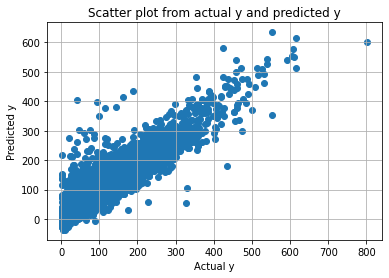

Mean Squared Error : 888.5380958074157


0.8558783344485142

In [27]:
# SkLearn SGD classifier
# Introducing the stochastic gradient descent regressor to train the model
n_iter=50
sgd = SGDRegressor(max_iter=n_iter,random_state=42)
sgd.fit(X_train, y_train)

y_pred=sgd.predict(X_test)

plt.scatter(y_test,y_pred)
plt.grid()
plt.xlabel('Actual y')
plt.ylabel('Predicted y')
plt.title('Scatter plot from actual y and predicted y')
plt.show()

print('Mean Squared Error :',mean_squared_error(y_test, y_pred))
r2_score(y_test, y_pred)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


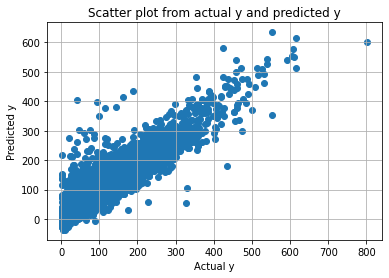

Mean Squared Error : 888.5380958074157
R2 : 0.8558783344485142


In [28]:
# SkLearn SGD classifier
# Introducing the stochastic gradient descent regressor to test the model
n_iter=50
sgd = SGDRegressor(max_iter=n_iter,random_state=42,tol=1e-3,penalty = "elasticnet")
sgd.fit(X_train, y_train)

y_pred=clf_.predict(X_test)

plt.scatter(y_test,y_pred)
plt.grid()
plt.xlabel('Actual y')
plt.ylabel('Predicted y')
plt.title('Scatter plot from actual y and predicted y')
plt.show()

print('Mean Squared Error :',mean_squared_error(y_test, y_pred))
print('R2 :',r2_score(y_test, y_pred))

In [29]:
from sklearn.metrics import mean_squared_error,accuracy_score,explained_variance_score,r2_score,mean_absolute_error,max_error

# sklearn.metrics.r2_score(y_test, y_pred_sksgd, sample_weight=None)

print("Variance", explained_variance_score(y_test, y_pred))
print("Max Error",max_error(y_test, y_pred))
print("Mean Absolute Error",mean_absolute_error(y_test,y_pred))
print("Mean Square Error",mean_squared_error(y_test, y_pred))
print("R Square Score",r2_score(y_test,y_pred))

Variance 0.8563371220092133
Max Error 362.3040712517513
Mean Absolute Error 20.09664904692784
Mean Square Error 888.5380958074157
R Square Score 0.8558783344485142


In [30]:
## We are using GridSearchCV to get the ideal hyperparameters for the model

# use a full grid over all parameters
param_grid = {'alpha': [0.00001,0.0001,0.0002],   
    'loss': ['squared_loss', 'huber', 'epsilon_insensitive'],
    'penalty': ['l2', 'l1'],
    'tol' : [0.0001,0.001,0.002],
    'learning_rate' : ['invscaling','adaptive'],
   'max_iter' : [1000,1500,2000],
}

In [31]:
# Running grid search
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(SGDRegressor(), param_grid=param_grid)
grid_search.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

GridSearchCV(cv=None, error_score=nan,
             estimator=SGDRegressor(alpha=0.0001, average=False,
                                    early_stopping=False, epsilon=0.1,
                                    eta0=0.01, fit_intercept=True,
                                    l1_ratio=0.15, learning_rate='invscaling',
                                    loss='squared_loss', max_iter=1000,
                                    n_iter_no_change=5, penalty='l2',
                                    power_t=0.25, random_state=None,
                                    shuffle=True, tol=0.001,
                                    validation_fraction=0.1, verbose=0,
                                    warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1e-05, 0.0001, 0.0002],
                         'learning_rate': ['invscaling', 'adaptive'],
                         'loss': ['squared_loss', 'huber',
                                  'epsilon_insen

**Interpretation**: In the above tuning, we observe that changing the loss function to epsilon_insensitive, which helps to focus more on linear loss than squared loss after a certain point(epsilon). It helps in ignoring errors upto a certain distance and we have increased the default value of .1 to 6. Changing the penalty from l2 to l1 allows feature selection to bring sparsity to the model and explore the data. Also, doing adaptive learning and setting the initial learning rate eta0 to .1 has helped us reduce the overall MAE compared to above. Since the data is randomized during after each SGD run, it is best to not mention the numerical values. We observe that these hyper-parameter tuning allowed us to reduce the error.

In [32]:
# Building model after using hyperparameters obtained from GridSearchCV 
optimised_SGD_Regressor = grid_search.best_estimator_
y_pred_grid = optimised_SGD_Regressor.predict(X_test)

In [33]:
# Evaluating the model after applying hyperparameter tuning
print("Variance", explained_variance_score(y_test, y_pred_grid))
print("Max Error",max_error(y_test, y_pred_grid))
print("Mean Absolute Error",mean_absolute_error(y_test,y_pred_grid))
print("Mean Square Error",mean_squared_error(y_test, y_pred_grid))
print("R Square Score",r2_score(y_test,y_pred_grid))

Variance 0.857539825922419
Max Error 369.37801582084654
Mean Absolute Error 19.887692555777036
Mean Square Error 878.812352114138
R Square Score 0.8574558586834524


After Hyper parameter tuning mean square error has significantly reduced. Mean absolute error is also reduced after hyper parameter tuning.